In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

# Neural Network training and investigation on the mnist dataset.

## Import needed python libraries

In [1]:
import os
import random
import pandas as pd
import numpy as np
import tensorflow as tf
import time
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, InputLayer
from keras import backend as K
from keras.utils import to_categorical
from matplotlib import pyplot
import ipywidgets
from gahyparopt import gahyperopt as ga 
from tensorflow.keras.utils import plot_model

2024-01-25 14:37:09.788563: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-25 14:37:09.979078: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Set GPU device

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"]="4"

## Load the data

In [2]:
# Get test and training data.
data = ga.load_mnist()

In [3]:
@ipywidgets.interact(i=ipywidgets.IntSlider(min=0, max=40000-1, step=100, value=0))
def plot_mnist_figure(i):
    print(data['y_train'][i])
    pyplot.imshow(data['x_train'][i].reshape(28,28), cmap='bone_r')

interactive(children=(IntSlider(value=0, description='i', max=39999, step=100), Output()), _dom_classes=('widg…

## Define functions

In [4]:
def generate_reference_ml():
    """
    Train and Generate NN Model based on https://github.com/fchollet/deep-learning-with-python-notebooks/blobs/master/2.1-a-first-look-at-a-neural-netword.ipynb'
    :param df: Dataframe to Training Process
    :return:
    """

    # Define Neural model Topology
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
    model.add(Dropout(.2))
    model.add(Dense(10, activation='softmax'))

    # Compile Neural model
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

    display(plot_model(model, show_shapes=True, show_layer_names=False))
    
    return model

def model_training(model, data):
    run_start = time.time()
    # Fit Model with Data
    x_train, y_train, x_val, y_val = data.values()
    training = model.fit(x_train, y_train,
        epochs=20,
        batch_size=128,
        steps_per_epoch=300,
        verbose=1,
        validation_data=(x_val, y_val),
    )

    run_stop = time.time()
    print(f"Done > Takes {run_stop-run_start} sec")
    
    return model, training



## Create a model and perform the training.

2024-01-25 14:37:31.192570: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-25 14:37:32.346723: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9798 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:1a:00.0, compute capability: 7.5
2024-01-25 14:37:32.347982: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9798 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:1b:00.0, compute capability: 7.5
2024-01-25 14:37:32.349174: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Creat

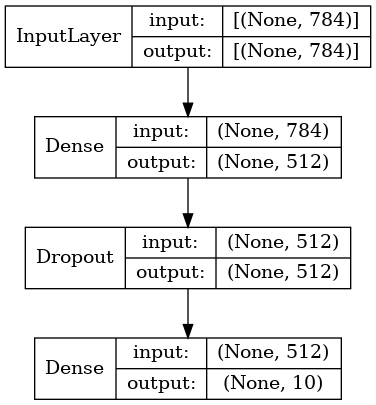

In [5]:
ml_model = generate_reference_ml()

In [6]:
model, training = model_training(ml_model, data)

Epoch 1/20


2024-01-25 14:37:36.711831: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7efdb41cf260 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-25 14:37:36.711871: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-01-25 14:37:36.711879: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (1): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-01-25 14:37:36.711885: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (2): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-01-25 14:37:36.711892: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (3): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-01-25 14:37:36.711897: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (4): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-01-25 14:37:

300/300 [==============================] - 4s 9ms/step - loss: 0.3390 - accuracy: 0.9020 - val_loss: 0.1869 - val_accuracy: 0.9455
Epoch 2/20
300/300 [==============================] - 2s 8ms/step - loss: 0.1490 - accuracy: 0.9565 - val_loss: 0.1361 - val_accuracy: 0.9592
Epoch 3/20
300/300 [==============================] - 2s 8ms/step - loss: 0.1022 - accuracy: 0.9694 - val_loss: 0.1117 - val_accuracy: 0.9668
Epoch 4/20
300/300 [==============================] - 2s 8ms/step - loss: 0.0806 - accuracy: 0.9765 - val_loss: 0.0981 - val_accuracy: 0.9718
Epoch 5/20
300/300 [==============================] - 2s 8ms/step - loss: 0.0597 - accuracy: 0.9818 - val_loss: 0.0907 - val_accuracy: 0.9725
Epoch 6/20
300/300 [==============================] - 2s 8ms/step - loss: 0.0514 - accuracy: 0.9845 - val_loss: 0.0887 - val_accuracy: 0.9733
Epoch 7/20
300/300 [==============================] - 2s 8ms/step - loss: 0.0424 - accuracy: 0.9873 - val_loss: 0.0875 - val_accuracy: 0.9745
Epoch 8/20
300/30

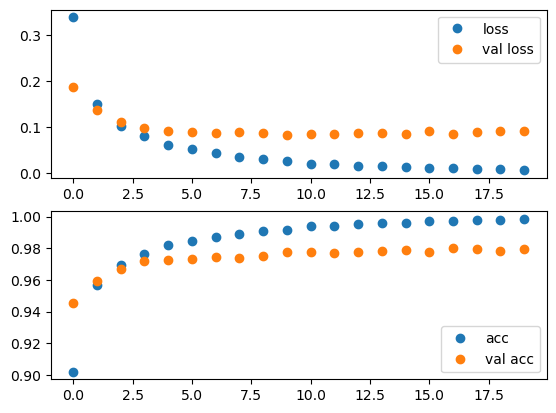

In [7]:
history = pd.DataFrame(training.history)

fig, ax = pyplot.subplots(2,1)
history['loss'].plot(ax=ax[0], style="o",label='loss')
history['val_loss'].plot(ax=ax[0], style="o",label='val loss')
ax[0].legend()
history['accuracy'].plot(ax=ax[1], style="o",label='acc')
history['val_accuracy'].plot(ax=ax[1], style="o",label='val acc')
ax[1].legend()

In [8]:
loss, accuracy = model.evaluate(x=data['x_val'], y=data['y_val'])

625/625 [==============================] - 3s 4ms/step - loss: 0.0910 - accuracy: 0.9797


In [9]:
print(f"Validation loss = {loss}")
print(f"Validation accuracy = {accuracy}")

Validation loss = 0.09102927893400192
Validation accuracy = 0.9797499775886536


## Was sagt das Model eigentlich voraus?

In [10]:
predicted = model.predict(data['x_val'])
expected = data['y_val']

625/625 [==============================] - 2s 3ms/step


In [11]:
predicted[0]

array([1.3800788e-13, 5.8027343e-11, 2.7626859e-10, 1.2895391e-07,
       2.4178922e-15, 1.7728251e-15, 5.4994053e-21, 9.9999976e-01,
       1.8862082e-12, 1.2510866e-07], dtype=float32)

In [13]:
@ipywidgets.interact(i=ipywidgets.IntSlider(min=0, max=20000-1, step=10, value=0))
def plot_prediction(i):
    fig, ax = pyplot.subplots(2,1, figsize=(10,10))
    ax[0].imshow(data['x_val'][i].reshape(28,28), cmap='bone_r')
    ax[0].set_title('MNIST')
    ax[1].bar(x=range(10), height=predicted[i,:], label="NN prediction")
    ax[1].bar(x=range(10), height=predicted[i,:], label="Truth", width=0.2)
    # ax[1].set_yscale('log')
    ax[1].set_ylim([0.01, 1])
    ax[1].set_title('Prediction')

interactive(children=(IntSlider(value=0, description='i', max=19999, step=10), Output()), _dom_classes=('widge…

Das Modell sagt voraus, mit welcher **Voraussichtlichkeit**, eine Ziffer einer Zahl zuzuordnen ist.

## Welche Zahlen werden nicht gut erkannt?

In [14]:
expected = data['y_val']

In [15]:
expected.shape

(20000, 10)

Berechne die Differenz zwischen Model und Wahrheit: Falls alle Vorhersagen richtig, Differenz = 0

In [16]:
difference = np.sum((predicted-expected)**2, -1)

In [17]:
mismatched = predicted[difference>0.5]
expected_mm = expected[difference>0.5]
images = data['x_val'][difference>0.5,:]

In [19]:
@ipywidgets.interact(i=ipywidgets.IntSlider(min=0, max=len(mismatched-1), step=1, value=0))
def plot_mismatch(i):
    fig, ax = pyplot.subplots(2,1, figsize=(10,10))
    ax[0].imshow(images[i].reshape(28,28), cmap='bone_r')
    ax[0].set_title('MNIST')
    ax[1].bar(x=range(10), height=mismatched[i,:], label="NN Prediction")
    ax[1].bar(x=range(10), height=expected_mm[i,:], width=0.2, label="Truth")
    # ax[1].set_yscale('log')
    ax[1].set_ylim([0.01, 1])
    ax[1].legend(loc=1)
    

interactive(children=(IntSlider(value=0, description='i', max=410), Output()), _dom_classes=('widget-interact'…

## Aufgaben
### Veraendere:
#### die Anzahl der Epochen (warum?)
#### die Anzahl der (internen) Netzwerkschichten: 2, 3, 4
#### die Anzahl der Neuronen in der/den versteckten Schichten (128, 256, 512).
### Notiere jeweils die Werte fuer "Validation loss" und "Validation accuracy"
### Fuer welche Kombination von Parametern erhaelst du die beste Validation accuracy
### Evaluiere zum Schluss das "beste" Modell mit dem Test Datensatz (`data[x_test`/`y_test]`]